In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve
)

In [2]:
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
df= sns.load_dataset('iris')
df=df.dropna()
df.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

([<matplotlib.patches.Wedge at 0x1e0eecc8bc0>,
 [Text(6.735557395310444e-17, 1.1, 'versicolor'),
  Text(-2.0206672185931328e-16, -1.1, 'virginica')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

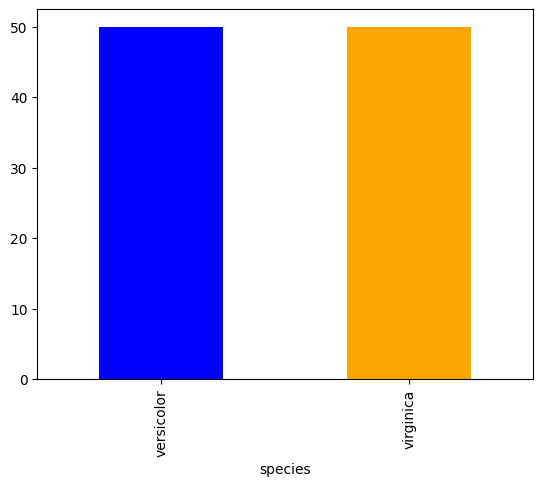

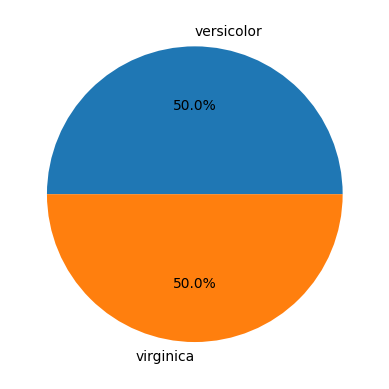

In [9]:
df=df[df['species']!='setosa']
dist= df['species'].value_counts()
colors = ['blue', 'orange'] 
dist.plot(kind='bar',color=colors)
labels=['versicolor','virginica']
ist= np.array(dist)
plt.figure()
plt.pie(dist,labels=labels,autopct='%1.1f%%')

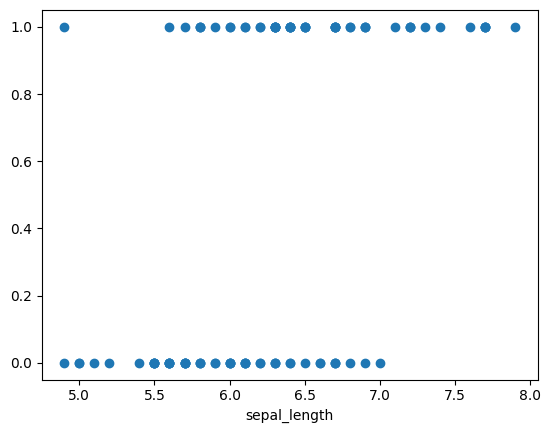

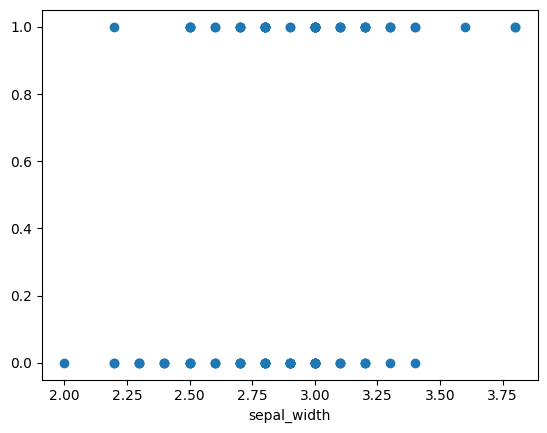

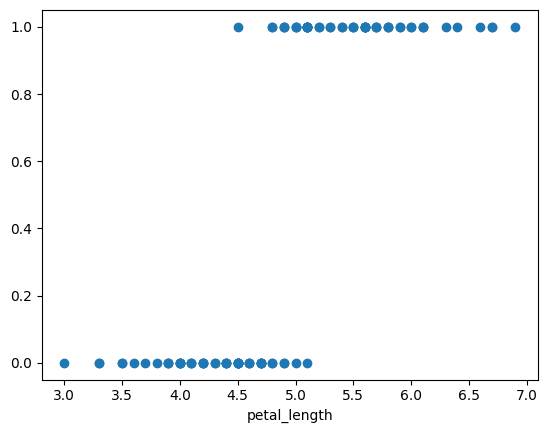

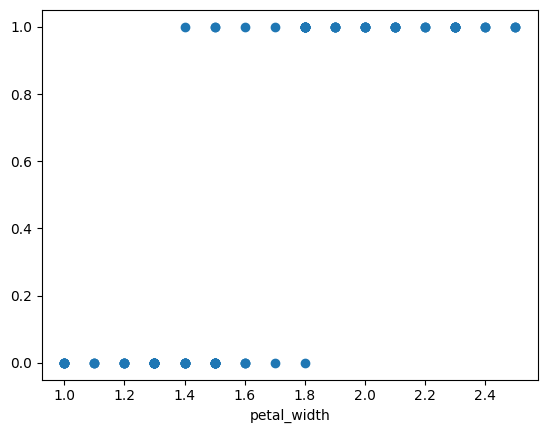

In [3]:
#Data_visualization#
X=df.drop(columns=['species'])
Y=df['species']
Y=LabelEncoder().fit_transform(Y)

for i in range(0,len(X.columns)):
    plt.figure()
    plt.scatter(X.iloc[:,i],Y)
    plt.xlabel(f'{X.columns[i]}')




4

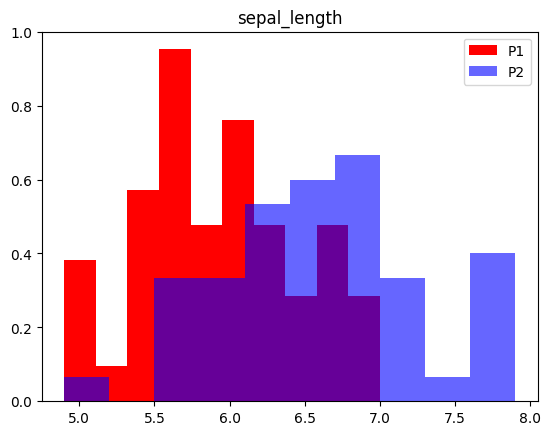

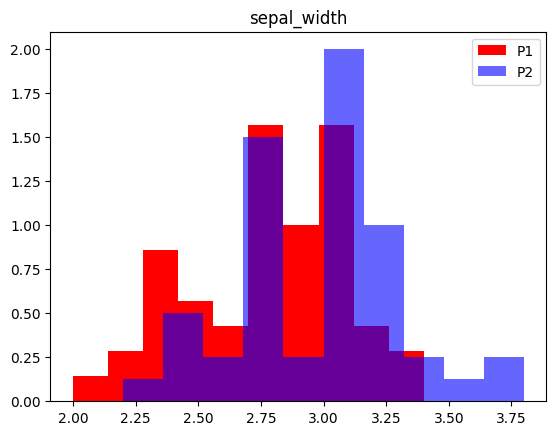

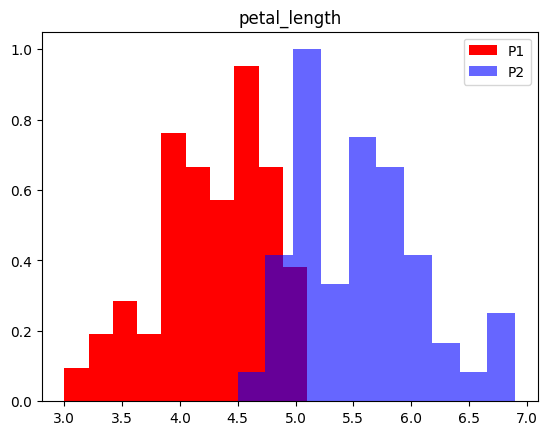

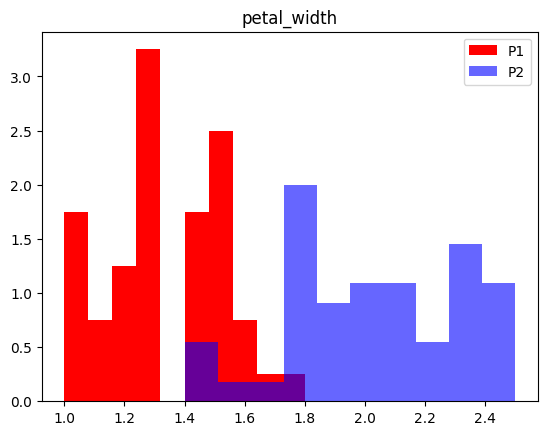

<Figure size 640x480 with 0 Axes>

In [121]:
#*******CHECKING PRIOR DISTRIBUTIONS ******#

species_n=LabelEncoder()
df= sns.load_dataset('iris')

df=df[df['species']!='setosa']
df['species_n']=species_n.fit_transform(df['species'])
df.drop(columns=['species'],inplace=True)

P1,P2,P3=[],[],[]
count=0
param=0
L=len(df.columns)-1
while(param<L):
    P1,P2,P3=[],[],[]
    count=0
    for i in df['species_n']:
        if(i==0):
            A=np.array([df.iloc[:,param]])
            P1.append(A[0][count])
        elif(i==1):
            A=np.array([df.iloc[:,param]])
            P2.append(A[0][count])
        else:
            P3.append(df.iloc[:,param][count])
        count=count+1   
    plt.hist(P1,color='red',label='P1',density=True)
    plt.hist(P2,color='blue',label='P2',alpha=0.6,density=True)
    # plt.hist(P3,color='green',label='P3',alpha=0.4)
    plt.title(f'{df.columns[param]}')
    
    plt.legend()
    # plt.axvline(x=np.mean(P1),linestyle='--',color='Black')
    # plt.axvline(x=np.mean(P2),linestyle='--',color='Black')
#     plt.axvline(x=np.mean(P3),linestyle='--',color='Black')
    param=param+1
    plt.figure()

L

petal_length
petal_width
species_n


<Axes: >

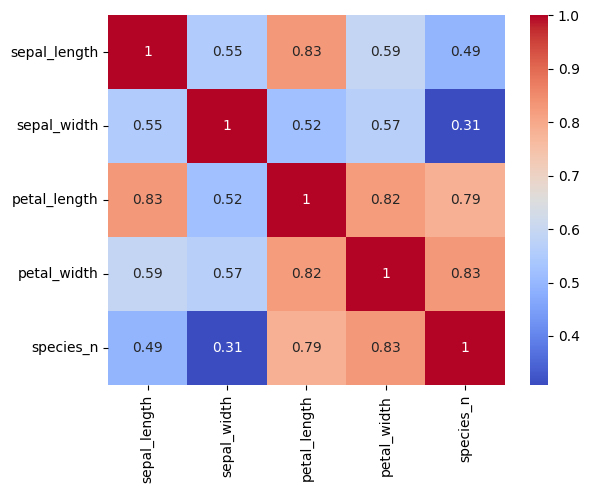

In [122]:
#*****Feature Selection******#
species_n=LabelEncoder()
df= sns.load_dataset('iris')
df=df[df['species']!='setosa']
df['species_n']=species_n.fit_transform(df['species'])
L_one=len(df.iloc[:,0])
df.drop(columns='species',inplace=True)
cm = df.corr()
count=0
for i in cm.iloc[:,-1]:
    if(i>0.7):
        print(cm.columns[count])
    count=count+1    
        
sns.heatmap(cm, annot=True, cmap='coolwarm')


In [78]:
#*****GAUSSIAN NAIVE BAYES*****#


df= sns.load_dataset('iris')
df=df[df['species']!='setosa']

X=df.drop(columns=['species'])
Y=df['species']
X1=X.iloc[:, 0:2]
X1=pd.DataFrame({df.columns[0]:X1.iloc[:,0],df.columns[1]:X1.iloc[:,1]})

model=GaussianNB()
X_train,X_test,Y_train,Y_test= train_test_split(X1,Y,train_size=0.8)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
accuracy_score(Y_test, Y_pred)
# X1




0.7

In [111]:
#******Kfold Cross Validation******#
#Naive Bayes & Log_Reg#


def model_acc(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    acc=accuracy_score(Y_test, Y_pred)
    return[Y_pred,acc]


df= sns.load_dataset('iris')
df=df[df['species']!='setosa']

X=df.drop(columns=['species'])
X=np.array(X)
Y=df['species']
Y=np.array(Y)

skf = StratifiedKFold(n_splits=5, shuffle=True)
accuracy_0,accuracy_1,accuracy_2=[],[],[]
counter=0
for train_index, test_index in skf.split(X, Y):
    Yn=df['species']
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model=GaussianNB()
    Y_pred,acc=model_acc(model,X_train,Y_train,X_test,Y_test)
    accuracy_0.append(acc)
    
    Y1=LabelEncoder().fit_transform(Yn)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y1[train_index], Y1[test_index]
    model1=LogisticRegression(max_iter=1000)
    Y_pred1,acc1=model_acc(model1,X_train,Y_train,X_test,Y_test)
    accuracy_1.append(acc1)

    model2= tree.DecisionTreeClassifier()
    Y_pred2,acc2=model_acc(model1,X_train,Y_train,X_test,Y_test)
    accuracy_2.append(acc2)

np.mean(accuracy_0),np.mean(accuracy_1),np.mean(accuracy_2)



(0.9200000000000002, 0.9400000000000001, 0.9400000000000001)